<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recordatorio**: todos los archivos cargados en Colab, eliminan después de su tiempo de ejecución.


---

# Sobreviviendo al Titanic
Andrea Marleny Hernández Contreras, 1203718

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
ds = pd.read_csv('data_titanic_proyecto.csv')
#Determinar las medidas del dataset
ds.shape
#Determinar el tipo de cada dato maneja
ds.dtypes

# 1. Encontrar valores faltantes

In [37]:
def findingmissingValues(dataset):
  for column in dataset:
    #En x almacena la cantidad de valores nulos que tiene esa columna
    x = dataset[column].isna().sum()
    #mostrar nombre de columna, cantidad de datos nulos en cada columna seguido del porcentaje que representa esos datos
    print(f"{column} : {str(x)} ( {(x/(ds.shape[0]))*100} %)")


def GeneralStatistics(dataset,columna):
    #creo un vector
    dimension = dataset[columna]
    mean = np.mean(dimension)
    median = np.median(dimension)
    valmax = np.max(dimension)
    valmin = np.min(dimension)
    desvstd = np.std(dimension)
    rango = np.ptp(dimension)
    print("="*60)
    print("Valores estadísticos")
    print("="*60)
    print("dimension: ",dimension)
    print("media: ", mean)
    print("mediana: ", median)
    print("Valor máximo: ",valmax)
    print("Valor mínimo: ",valmin)
    print("desviación estandar: ",desvstd)
    print("rango", rango)


In [ ]:
#Agregar caracteristicas al dataset
#Asimismo en datos aparece que iba solo, agrega 1
ds["Familysize"] = ds["SibSp"] + ds["Parch"] + 1
#Crear un campo para ver si iba solo, inicializamos en cero
ds["IsAlone"] = 0
#Agrega campos a IsAlone al usar función loc para traer las columnas y filas
#Indicamos trae todos los datos donde FamilySize es 1 y superponelo en IsAlone el campo 1
ds.loc[ds["Familysize"]==1,"IsAlone"]=1
ds

Al estar a la izquiera, median<mean

Al estar a la derecha, median>mean

Al estar centrado, median=mean

Valores estadísticos
dimension:  0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
777     5.0
779    43.0
780    13.0
781    17.0
782    29.0
Name: Age, Length: 624, dtype: float64
media:  29.94378205128205
mediana:  28.0
Valor máximo:  80.0
Valor mínimo:  0.67
desviación estandar:  14.550252061564517
rango 79.33


<ipython-input-41-efceb1e469fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsage["Age"].fillna(28,inplace=True)


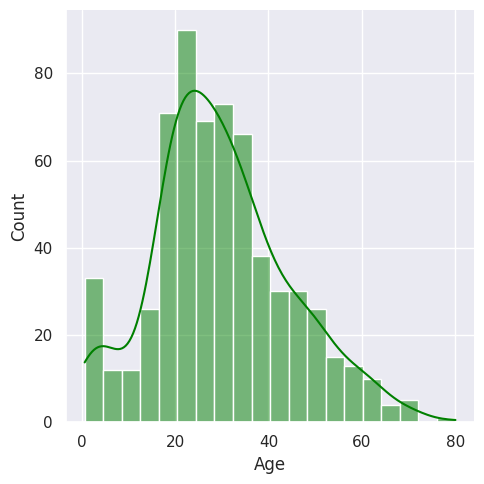

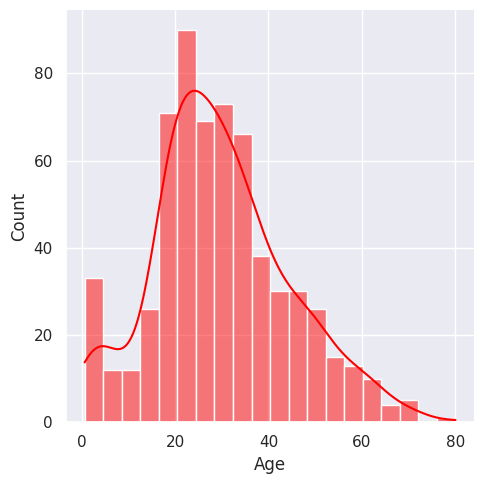

In [41]:
#Creando algo similar a lo anterior, en lugar, usar columnas, usa filas
#Indico trae todas las filas donde la edad no sea igual a NA
dsage=ds[ds["Age"].notna()]
GeneralStatistics(dsage,"Age")

#Creando un diagrama de distribución de frecuencia, un pequeño histograma
sb.set_theme()
sb.displot(ds["Age"],kde=True,color="green")

#Función que permite agregar un valor a todos los que son na
#primera ejecución obtuvo que la mediana es 28
#sustituyendo valores faltants por la mediana
#Aquí está ligeramente inclinado a la izquierda, median<mean
dsage["Age"].fillna(28,inplace=True)
sb.displot(dsage["Age"],kde=True,color="red")

Diccionarios son nativos de Python, no es necesario usar una librería

In [42]:
categorical_replacements = {
    "passenger_survived": {"N":0,"Y":1},
    "passenger_sex": {"M":1,"F":0},
    "passenger_class": {"Lower":0,"Middle":1,"Upper":2}
}